# 决策树

优点：计算复杂度不高，输出结果可以理解，对中间值缺失不敏感，可以处理不相关特征数据。  
缺点：可能会产生过度匹配问题。  
适用数据类型：数值型和标称型。

决策树的一般流程：  
准备数据：树构造算法只适用于标称型数据，因此数值型数据必须离散化。   
分析数据：可以使用任何方法，在树构造完成之后，应该检查图像是否符合预期。  
训练算法：构造树的数据结构。  
测试算法：使用经验树计算错误率。  
使用算法：使用决策树可以更好的理解数据的内在含义。

创建分支的伪代码CreatBranch（）：

检测数据集中的每个子项是否属于同一分类：  

    if so ：
        return 类标签
    Else：
        寻找划分数据集的最好特征
        划分数据集
        创建分支节点
           for 每个划分的子集
               调用函数CreatBranch()并增加返回结果到分支节点中
        return 分支节点

决策树要如何构建，这一过程可以概括为3个步骤：特征选择、决策树的生成和决策树的修剪。

ID3算法介绍   
ID3算法是决策树的一种，它是基于奥卡姆剃刀原理的，即用尽量用较少的东西做更多的事。   
(奥卡姆（Ockham）位于英格兰的萨里郡）提出的一个解决问题的法则，他在《箴言书注》2卷15题说“切勿浪费较多东西，去做‘用较少的东西，同样可以做好的事情’。”换一种说法，如果关于同一个问题有许多种理论，每一种都能作出同样准确的预言，那么应该挑选其中使用假定最少的。尽管越复杂的方法通常能做出越好的预言，但是在不考虑预言能力（即结果大致相同）的情况下，假设越少越好。)    
ID3算法，即Iterative Dichotomiser 3，迭代二叉树3代，是Ross Quinlan发明的一种决策树算法，这个算法的基础就是上面提到的奥卡姆剃刀原理，越是小型的决策树越优于大的决策树，尽管如此，也不总是生成最小的树型结构，而是一个启发式算法。ID3算法的核心思想就是以信息增益来度量属性的选择，选择分裂后信息增益最大的属性进行分裂。该算法采用自顶向下的贪婪搜索遍历可能的决策空间。

In [1]:
from math import log
import operator

In [2]:
def clacShannonEnt(dataSet):#传入一个dataset具备单个特征，返回这种特征下的信息熵
    numEntries=len(dataSet)

    
    #为所有可能的分类创建字典，并记录每个分类的次数
    labelCounts={}
    for featVec in dataSet:
        currentLabel = featVec[-1]#这里的label信息在dataset的最后一位
     #以下统计label的总类
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel]=0
        labelCounts[currentLabel]+=1
    #以2为底求对数
    shannonEnt=0.0
    for key in labelCounts:#对字典键值迭代
        prob = float(labelCounts[key])/numEntries #选择该标签(Label)的概率
        shannonEnt-=prob*log(prob,2)   #以2为底求对数
    return shannonEnt
            

In [3]:
def createDataset():
    dataSet=[[1,1,"maybe"],
            [1,1,"yes"],
            [0,1,"no"],
            [0,1,"no"],
            [0,1,"no"]]
    labels=["no surfacing","flippers"]
    return dataSet,labels

熵越高，混合的数据也就越多，得到熵之后就可以按照获取最大信息增益的方法划分数据集。

In [4]:
#按照给定特征划分数据集
def splitDataSet(dataSet,axis,value):
    retDataSet=[]                   #创建新的list对象
    for featVec in dataSet:
        if featVec[axis]==value:
            reducedFeatVec=featVec[:axis]                  #因为计算信息熵的子函数是去最后一个[-1]这个是
            reducedFeatVec.extend(featVec[axis+1:])#这里是就中间axis这一列不要。
            retDataSet.append(reducedFeatVec)
    return retDataSet


   python语言在函数中传递的是列表的引用，在函数内部对列表对象的修改，将会影响改列表对象的整个生存周期。为了消除这个不了影响，我们需要在函数的开始的内部开始声明一个新列表对象。因为该函数代码在同一数据集上被调用多次，为了不修改原始数据，创建一个新的列表对象。    
   数据集这个列表中的各个元素也是列表，我们要遍历整个数据集中的每个元素，一旦发现符合要求的值，则将其添加到新创建的列表中。在if语句中将符合特征的数据抽取出来。当我们按照某个特征划分数据集时就需要将所有符合要求的元素抽取出来。

In [5]:
dataSet,labels=creatDataset()
splitDataSet(dataSet,0,0)

NameError: name 'creatDataset' is not defined

In [6]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures=len(dataSet[0])-1#除去label的feature个数
    baseEntropy=clacShannonEnt(dataSet)
    bestInfoGain=0.0
    bestFeature=-1
    for i in range(numFeatures):#第一个for循环遍历数据集中的所有特征
        featList=[example[i] for example in dataSet]#创建当前特征下唯一的分类标签列表
        uniqueVals=set(featList)
        newEntropy=0.0
        for value in uniqueVals:#计算每种划分方式的信息熵,对每种属性划分一次数据集
            subDataSet=splitDataSet(dataSet,i,value)
            prob=len(subDataSet)/float(len(dataSet))
            newEntropy+=prob*clacShannonEnt(subDataSet)
        infoGain=baseEntropy-newEntropy
        print("第%d个特征的增益为%.3f" % (i, infoGain)) 
        
        if(infoGain>bestInfoGain):#计算最好的信息增益
            bestInfoGain=infoGain
            bestFeature=i
            
    return bestFeature
#数据必须是由列表元素组成的列表，而且所以的列表函数都要具有相同长的数据长度；第二个要求是数据最后一列是当前实例的类别标签。
#信息增益=熵减少=数据无序度减少

In [7]:
def createDataSet1():
    dataSet = [[0, 0, 0, 0, 'no'],                        #数据集
            [0, 0, 0, 1, 'no'],
            [0, 1, 0, 1, 'yes'],
            [0, 1, 1, 0, 'yes'],
            [0, 0, 0, 0, 'no'],
            [1, 0, 0, 0, 'no'],
            [1, 0, 0, 1, 'no'],
            [1, 1, 1, 1, 'yes'],
            [1, 0, 1, 2, 'yes'],
            [1, 0, 1, 2, 'yes'],
            [2, 0, 1, 2, 'yes'],
            [2, 0, 1, 1, 'yes'],
            [2, 1, 0, 1, 'yes'],
            [2, 1, 0, 2, 'yes'],
            [2, 0, 0, 0, 'no']]
    labels = ['不放贷', '放贷']            #分类属性
    return dataSet, labels                             #返回数据集和分类属性


In [8]:
dataSet,labels=createDataSet1()
a=chooseBestFeatureToSplit(dataSet)
print(a)

第0个特征的增益为0.083
第1个特征的增益为0.324
第2个特征的增益为0.420
第3个特征的增益为0.363
2


In [9]:
dataSet

[[0, 0, 0, 0, 'no'],
 [0, 0, 0, 1, 'no'],
 [0, 1, 0, 1, 'yes'],
 [0, 1, 1, 0, 'yes'],
 [0, 0, 0, 0, 'no'],
 [1, 0, 0, 0, 'no'],
 [1, 0, 0, 1, 'no'],
 [1, 1, 1, 1, 'yes'],
 [1, 0, 1, 2, 'yes'],
 [1, 0, 1, 2, 'yes'],
 [2, 0, 1, 2, 'yes'],
 [2, 0, 1, 1, 'yes'],
 [2, 1, 0, 1, 'yes'],
 [2, 1, 0, 2, 'yes'],
 [2, 0, 0, 0, 'no']]

#第一次划分之后，数据将向下传递到树分支的下一个节点，在这个节点上，再次划分数据，因此用的是递归的方法。    
递归结束的条件是：程序遍历完所有划分数据集，或者每个分支下的所有实例都具有相同的分类。如果所有实例具有相同的分类，则得到一个叶子节点或者终止块。任何达到叶子节点的数据必然属于叶子节点的分类。

In [10]:
def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote in classCount.keys():
            classCount[vote]=0
            classCount[vote]+=1
    sortedClassCount=sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
        #sorted(itrearble, cmp=None, key=None, reverse=False)
        #=号后面是默认值 默认是升序排序的， 如果想让结果降序排列，用reverse=True
        #interitems 迭代器函数，sort()与sorted()的不同在于，sort是在原位重新排列列表，而sorted()是产生一个新的列表。
        #返回值：是一个经过排序的可迭代类型，与iterable一样。
        #itemgetter(1)按照第二个排序，#####这里是[("a",5),("b",3)]选择第二个
    return sortedClassCount[0][0]

创建树函数代码

In [11]:
def createTree(dataSet,labels):
    classList=[example[-1] for example in dataSet]
    if classList.count(classList[0])==len(classList):#类别完全相同则停止划分
        return classList[0]
    if len(dataSet[0])==1:#遍历完所有特征时返回次数最多的类别，即使用完了所有特征，仍然不能将数据集仅划分包含唯一类别的分钟。
        return majorityCnt(classList)#由于第二个条件无法简单返回唯一的类标签，使用majoritycnt挑选出现次数最多的类别作为返回值。
    bestFeat= chooseBestFeatureToSplit(dataSet)
    bestFeatLabel=labels[bestFeat]
    myTree={bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues=[example[bestFeat]for example in dataSet]#得到列表包含的所有属性
    uniqueVals=set(featValues)
    for value in uniqueVals:
        subLabels=labels[:]#这行代码复制了类标签，并将其储存在新列表变量sublabel中，在python中函数参数时列表类型时，参数按引用传递。
        myTree[bestFeatLabel][value]=createTree(splitDataSet(dataSet,bestFeat,value),subLabels)
    return myTree

In [12]:
myDat,labels=createDataset()
mytree=createTree(myDat,labels)


第0个特征的增益为0.971
第1个特征的增益为0.000
第0个特征的增益为0.000


In [13]:
mytree

{'no surfacing': {0: 'no', 1: {'flippers': {'maybe': 'maybe', 'yes': 'yes'}}}}

In [14]:
import matplotlib.pyplot as plt

In [15]:

#定义文本框和箭头格式
decisionNode=dict(boxstyle="sawtooth",fc="0.8")
leafNode=dict(boxstyle="round4",fc="0.8")
arrow_args=dict(arrowstyle="<-")
#绘制带箭头的注解
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',
             xytext=centerPt, textcoords='axes fraction',
             va="center", ha="center", bbox=nodeType, arrowprops=arrow_args )
    
def createPlot():
    fig=plt.figure(1,facecolor="white")
    fig.clf()
    createPlot.ax1=plt.subplot(111,frameon=False)
    plotNode("决策节点",(0.5,0.1),(0.1,0.5),decisionNode)
    plotNode("叶节点",(0.8,0.1),(0.3,0.8),leafNode)
    plt.show()

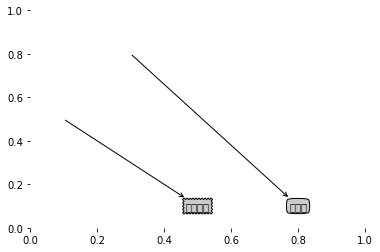

In [16]:
createPlot()


获取叶节点的数目和树的层数

In [17]:
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = next(iter(myTree))  #这里next拿到的是key
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            numLeafs += getNumLeafs(secondDict[key])
        else:   numLeafs +=1
    return numLeafs
#第一个关键字是第一次划分数据集的类别标签，附带数组表示子节点的取值，从第一个关键字出发，我们可以遍历整颗数的所有子节点。如果子节点是字典类型
#则该节点也是一个判断节点，需要递归getNumLeaf（）

In [18]:
def getTreeDepth(myTree):
    maxDepth=0
    firstStr = next(iter(myTree))  
    secondDict=myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=="dict":
            thisDepth=1+getTreeDepth(secondDict[key])
        else:
            thisDepth=1
        if thisDepth>maxDepth:maxDepth=thisDepth
    return maxDepth
#计算遍历过程中遇到判断节点的个数。该函数的的终止条件是叶子节点，一旦到达叶子节点，则从递归调用中返回，并将计算树的深度加一。

In [19]:
#预设的树
def retrieveTree(i):
    listOfTrees=[{"no surfacing":{0:"no",1:{"flippers":{0:"no",1:"yes"}}}},
                 {"no surfacing":{0:"no",1:{"flippers":{0:{"head":{0:"no",1:"yes"}},1:"no"}}}}
                ]
    return listOfTrees[i]

In [20]:
mytree1=retrieveTree(0)
a=getNumLeafs(mytree1)
b=getTreeDepth(mytree1)
print(a,b)

3 2


In [21]:
#在父子节点填充文本信息
def plotMidText(cntrPt,parentPt,txtString):
    xMid=(parentPt[0]-cntrPt[0])/2.0+cntrPt[0]
    yMid=(parentPt[1]-cntrPt[1])/2.0+cntrPt[1]
    createPlot.ax1.text(xMid,yMid,txtString)

In [22]:
def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)  
    depth = getTreeDepth(myTree)
    firstSides = list(myTree.keys())
    firstStr = firstSides[0]#找到输入的第一个元素
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=="dict":   
            plotTree(secondDict[key],cntrPt,str(key))        
        else:   
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
    

In [23]:
def createPlot(inTree):
    fig = plt.figure(1, facecolor="white")
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)    
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;
    plotTree(inTree, (0.5,1.0), " ")
    plt.show()
    

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


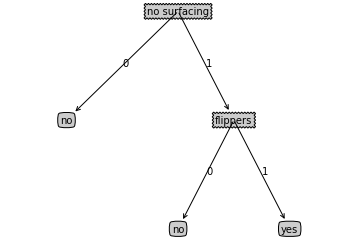

In [24]:
mytree = retrieveTree(0)
print(mytree)
createPlot(mytree)

依靠训练数据构造了决策树之后，我们可以将它用于实际数据的分类。在执行数据分类时，需要使用决策树以及用于构造决策树的标签向量。然后，程序毕竟测试与决策树上的数值，递归执行该过程直到进入叶子节点；最后将测试数据定义为叶子节点所属的类型。

In [25]:
def classify(inputTree,featLabels,testVec):
    firstStr=list(inputTree.keys())[0]
    secondDict=inputTree[firstStr]
    featIndex=featLabels.index(firstStr)#将标签字符串转化为索引
    for key in secondDict.keys():
        if testVec[featIndex]==key:
            if type(secondDict[key]).__name__=="dict":
                classLabel=classify(secondDict[key],featLabels,testVec)
            else:
                classLabel=secondDict[key]
    return classLabel
#特征标签列表，使用Index方法查找当前列表中第一个匹配firstStr变量的元素
#然后代码递归遍历整棵树，比较testVec变量中的值与树节点的值，如果达到叶子节点，则返回当前节点的分类标签。

In [26]:
myDat,labels=createDataset()

In [27]:
myDat

[[1, 1, 'maybe'], [1, 1, 'yes'], [0, 1, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [28]:
labels

['no surfacing', 'flippers']

In [29]:
classify(mytree1,labels,[1,0])

'no'

构造决策树是很耗时的任务，因此使用Python模块pickle序列化对象。序列化对象可以在磁盘上保存对象，并且在需要的时候读取出来。任何对象都可以执行序列化操作

In [30]:
def storeTree(inputTree,filename):
    import pickle
    fw=open(filename,"wb")
    pickle.dump(inputTree,fw)
    fw.close()


In [31]:
def grabTree(filename):
    import pickle
    fr=open(filename,"rb")
    return pickle.load(fr)

In [32]:
storeTree(mytree1,"classifierStorage.txt")

In [33]:
grabTree("classifierStorage.txt")

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [34]:
fr=open("lenses.txt")
lenses=[inst.strip().split("\t")for inst in fr.readlines()]
lensesLabels=["age","prescript","astigmatic","tearRate"]
lensesTree=createTree(lenses,lensesLabels)

第0个特征的增益为0.039
第1个特征的增益为0.040
第2个特征的增益为0.377
第3个特征的增益为0.549
第0个特征的增益为0.221
第1个特征的增益为0.095
第2个特征的增益为0.770
第0个特征的增益为0.252
第1个特征的增益为0.459
第0个特征的增益为0.918
第0个特征的增益为0.317
第1个特征的增益为0.191
第0个特征的增益为1.000


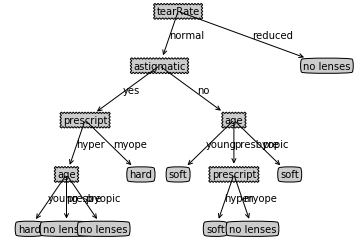

In [35]:
createPlot(lensesTree)

可以通过裁剪决策树解决overfitting的问题，去掉一些不必要的叶子节点。如果叶子叶子节点只增加少数信息，则可以删除该节点，将它并入其他节点中。

决策树分类器就像带有终止块的流程图，终止块表示分类结果。开始处理数据集时，我们首先需要测量集合中数据的不一致性，也就是熵，然后寻找最优方案划分数据集，直到数据集中的所有数据属于同一分类。ID3算法可以用于划分标称型数据集。构建决策树时，我们通常采用递归的方法将数据集转化为决策树。一般我们并不构造新的数据结构，而是使用python语言内嵌的数据结构字典存储树节点信息。使用Matplotlib的注解功能，我们可以将存储的树结构转化为容易理解的图形。 python语言的 pickle模块可用于存储决策树的结构。隐形眼镜的例子表明决策树可能会产生过多的数据集划分，从而产生过度匹配数据集的问题。我们可以通过裁剪决策树，合并相邻的无法产生大量信息增益的叶节点，消除过度匹配问题。

当样本数量少但是样本特征非常多的时候，决策树很容易过拟合，一般来说，样本数比特征数多一些会比较容易建立健壮的模型
如果样本数量少但是样本特征非常多，在拟合决策树模型前，推荐先做维度规约，比如主成分分析（PCA），特征选择（Losso）或者独立成分分析（ICA）。这样特征的维度会大大减小。再来拟合决策树模型效果会好。
推荐多用决策树的可视化，同时先限制决策树的深度，这样可以先观察下生成的决策树里数据的初步拟合情况，然后再决定是否要增加深度。
在训练模型时，注意观察样本的类别情况（主要指分类树），如果类别分布非常不均匀，就要考虑用class_weight来限制模型过于偏向样本多的类别。
决策树的数组使用的是numpy的float32类型，如果训练数据不是这样的格式，算法会先做copy再运行。
如果输入的样本矩阵是稀疏的，推荐在拟合前调用csc_matrix稀疏化，在预测前调用csr_matrix稀疏化。

In [36]:
from sklearn import tree

In [37]:
fr = open('lenses.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
print(lenses)
lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']


[['young', 'myope', 'no', 'reduced', 'no lenses'], ['young', 'myope', 'no', 'normal', 'soft'], ['young', 'myope', 'yes', 'reduced', 'no lenses'], ['young', 'myope', 'yes', 'normal', 'hard'], ['young', 'hyper', 'no', 'reduced', 'no lenses'], ['young', 'hyper', 'no', 'normal', 'soft'], ['young', 'hyper', 'yes', 'reduced', 'no lenses'], ['young', 'hyper', 'yes', 'normal', 'hard'], ['pre', 'myope', 'no', 'reduced', 'no lenses'], ['pre', 'myope', 'no', 'normal', 'soft'], ['pre', 'myope', 'yes', 'reduced', 'no lenses'], ['pre', 'myope', 'yes', 'normal', 'hard'], ['pre', 'hyper', 'no', 'reduced', 'no lenses'], ['pre', 'hyper', 'no', 'normal', 'soft'], ['pre', 'hyper', 'yes', 'reduced', 'no lenses'], ['pre', 'hyper', 'yes', 'normal', 'no lenses'], ['presbyopic', 'myope', 'no', 'reduced', 'no lenses'], ['presbyopic', 'myope', 'no', 'normal', 'no lenses'], ['presbyopic', 'myope', 'yes', 'reduced', 'no lenses'], ['presbyopic', 'myope', 'yes', 'normal', 'hard'], ['presbyopic', 'hyper', 'no', 'redu

In [38]:
import pandas as pd
from sklearn import preprocessing

In [39]:
target=[]
data=[]
for each in lenses:
    target.append(each[-1])
    data.append(each[:-1])


In [40]:
target

['no lenses',
 'soft',
 'no lenses',
 'hard',
 'no lenses',
 'soft',
 'no lenses',
 'hard',
 'no lenses',
 'soft',
 'no lenses',
 'hard',
 'no lenses',
 'soft',
 'no lenses',
 'no lenses',
 'no lenses',
 'no lenses',
 'no lenses',
 'hard',
 'no lenses',
 'soft',
 'no lenses',
 'no lenses']

In [41]:
le = preprocessing.LabelEncoder()
le.fit(target)
e_target=le.transform(target)

In [42]:
e_target

array([1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1,
       1], dtype=int64)

In [43]:
label_dict={}
label_list=[]
for each_label in lensesLabels:
    for each_data in lenses:
        label_list.append(each_data[lensesLabels.index(each_label)])
    label_dict[each_label]=label_list
    label_list=[]



In [44]:
lenses_pd=pd.DataFrame(label_dict)

In [45]:
lenses_pd

,age,astigmatic,prescript,tearRate
0,young,no,myope,reduced
1,young,no,myope,normal
2,young,yes,myope,reduced
3,young,yes,myope,normal
4,young,no,hyper,reduced
5,young,no,hyper,normal
6,young,yes,hyper,reduced
7,young,yes,hyper,normal
8,pre,no,myope,reduced
9,pre,no,myope,normal


In [46]:
for col in lenses_pd.columns: #这里注意
    lenses_pd[col]=le.fit_transform(lenses_pd[col])
print (lenses_pd)

    age  astigmatic  prescript  tearRate
0     2           0          1         1
1     2           0          1         0
2     2           1          1         1
3     2           1          1         0
4     2           0          0         1
5     2           0          0         0
6     2           1          0         1
7     2           1          0         0
8     0           0          1         1
9     0           0          1         0
10    0           1          1         1
11    0           1          1         0
12    0           0          0         1
13    0           0          0         0
14    0           1          0         1
15    0           1          0         0
16    1           0          1         1
17    1           0          1         0
18    1           1          1         1
19    1           1          1         0
20    1           0          0         1
21    1           0          0         0
22    1           1          0         1
23    1         

In [47]:

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)#参数非常多
clf=clf.fit(lenses_pd.values.tolist(),target)


In [48]:
print(clf.predict([[1,1,1,0]]))   

['hard']


使用joblib保存模型

In [50]:
from sklearn.externals import joblib
joblib.dump(clf, 'TREE.model')


['TREE.model']

In [51]:
clf_1=joblib.load("TREE.model")
print(clf_1.predict([[1,1,1,0]]))   

['hard']


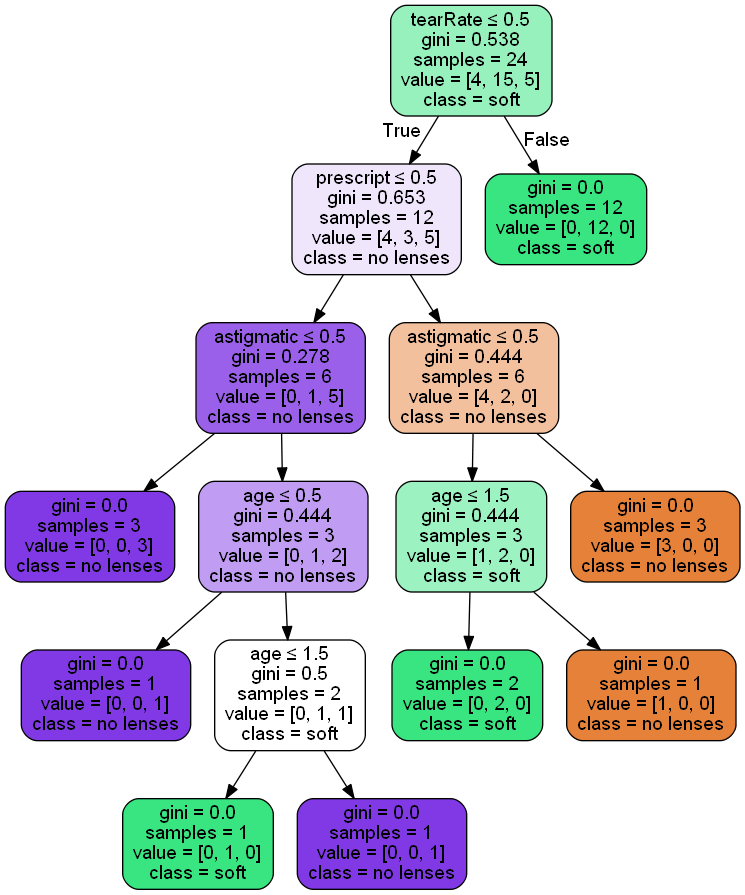

In [54]:
import pydotplus
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=lensesLabels,  
                         class_names=target,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [55]:
clf2 = DecisionTreeClassifier(criterion="entropy",random_state=0)#参数非常多
clf2=clf2.fit(lenses_pd.values.tolist(),target)

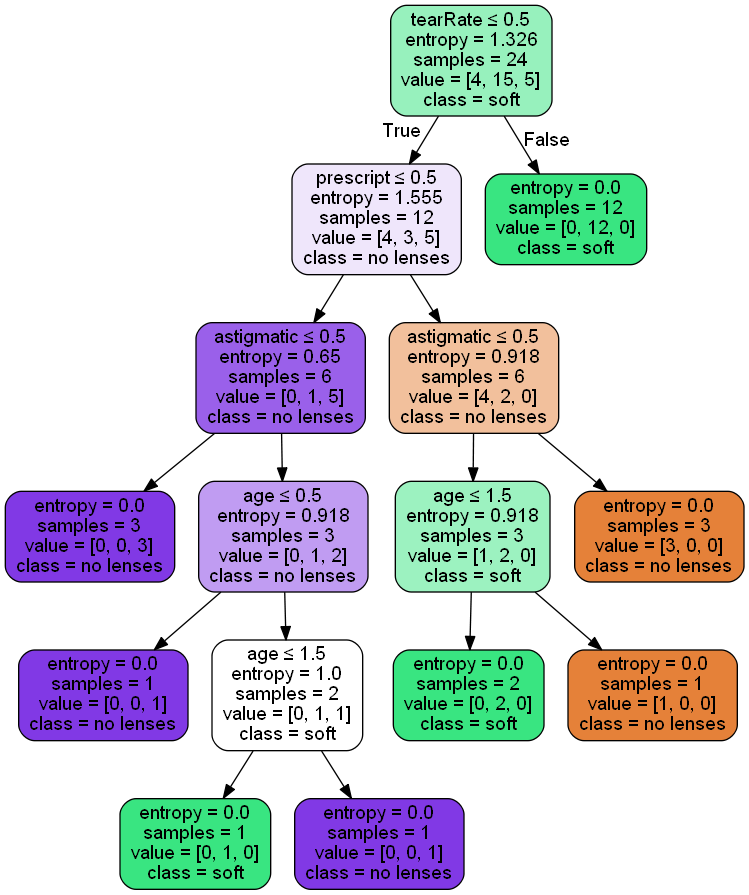

In [56]:
dot_data = tree.export_graphviz(clf2, out_file=None, 
                         feature_names=lensesLabels,  
                         class_names=target,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 